In [8]:
import pandas as pd
import numpy as np
import ast
from matplotlib import pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import re
import xgboost as xgb
import tensorflow as tf

# 1. Looking to Initial DB

<a id="section1"></a>

In [2]:
try:
    df = pd.read_csv(r'Initial DB\books.csv')
except pd.errors.ParserError as e:
    print(f"Error: {e}")

# Error on the data so we went to correct the data in the csv file


Error: Error tokenizing data. C error: Expected 12 fields in line 3350, saw 13



- Error: Error tokenizing data. C error: Expected 12 fields in line 3350, saw 13
- Error: Error tokenizing data. C error: Expected 12 fields in line 4704, saw 13
- Error: Error tokenizing data. C error: Expected 12 fields in line 5879, saw 13
- Error: Error tokenizing data. C error: Expected 12 fields in line 8981, saw 13

Those error are all because some author fields contains ",", so it kill the shape of the csv file.
We solve that by hand and the new corrected file is located in "Initial\corrected_books.csv"


# 2. Exploring DataBases

<h2>Exploration</h2>

In [3]:
df = pd.read_csv(r'Initial DB\corrected_books.csv')
df_author = pd.read_csv(r'Feature DB\author_info.csv')
df_genre = pd.read_csv(r'Feature DB\books_genre.csv')
df_info = pd.read_csv(r'Feature DB\books_info.csv')

In [4]:

df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [5]:
df_author.head()

,average_rating,author_id,text_reviews_count,name,ratings_count
0,3.98,604031,7,Ronald J. Fields,49
1,4.08,626222,28716,Anita Diamant,546796
2,3.92,10333,5075,Barbara Hambly,122118
3,3.68,9212,36262,Jennifer Weiner,888522
4,3.82,149918,96,Nigel Pennick,1740


In [6]:
df.isna().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [7]:
df=df.rename(columns={'  num_pages': 'num_pages'})

In [8]:
df.to_csv(r"Feature DB\improved_dataset.csv", index=False)

In [9]:
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11127.000000,11127.000000,1.112700e+04,11127.000000,1.112700e+04,11127.000000
mean,21310.938887,3.933631,9.759888e+12,336.376921,1.793641e+04,541.854498
std,13093.358023,0.352445,4.428964e+11,241.127305,1.124794e+05,2576.176608
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10287.000000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780586e+12,299.000000,7.450000e+02,46.000000
75%,32104.500000,4.135000,9.780873e+12,416.000000,4.993500e+03,237.500000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


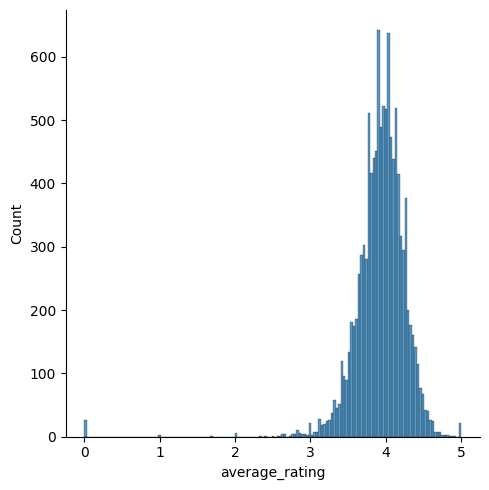

In [10]:
sns.displot(df.average_rating)

In [11]:
df_author = df_author.dropna()
df_author.head()

,average_rating,author_id,text_reviews_count,name,ratings_count
0,3.98,604031,7,Ronald J. Fields,49
1,4.08,626222,28716,Anita Diamant,546796
2,3.92,10333,5075,Barbara Hambly,122118
3,3.68,9212,36262,Jennifer Weiner,888522
4,3.82,149918,96,Nigel Pennick,1740


In [12]:
df_info = df_info.dropna()
df_info.head()

,book_id,country_code,authors,isbn13
0,38568,US,"[{'author_id': '17059', 'role': ''}]",9780060773755
1,38562,US,"[{'author_id': '17059', 'role': ''}]",9780060774073
2,38564,US,"[{'author_id': '21701', 'role': ''}]",9780425209424
3,39307,US,"[{'author_id': '1356336', 'role': ''}]",9780312940027
4,23717,US,"[{'author_id': '12948', 'role': ''}]",9781569312063


In [13]:
df_info['country_code'].value_counts()

country_code
US    9289
Name: count, dtype: int64

US is the only value so we can drop this column because it is useless

In [14]:
df_info = df_info.drop('country_code', axis=1)

In [15]:
df_genre = df_genre.dropna()

df_genre.head()

,book_id,genres
0,38568,"{'fantasy, paranormal': 1907, 'romance': 1598,..."
1,38562,"{'fantasy, paranormal': 1002, 'romance': 896, ..."
2,38564,"{'young-adult': 315, 'fantasy, paranormal': 27..."
3,39307,"{'fantasy, paranormal': 128, 'romance': 40, 'f..."
4,23717,"{'fantasy, paranormal': 3, 'fiction': 2, 'comi..."


<H1>Join the datasets</h1>

Verify unique value on the join columns

In [16]:
values_to_keep = df['isbn13'].unique()

#Filter df_info to keep only rows where column1 values are in values_to_keep
df_info = df_info[df_info['isbn13'].isin(values_to_keep)]

In [17]:
values_to_keep = df_info['book_id'].unique()

# Filter df_info to keep only rows where column1 values are in values_to_keep
df_genre = df_genre[df_genre['book_id'].isin(values_to_keep)]

<H2>join books.csv and books_info.csv in final_df</h2>

In [18]:
df['isbn13'] = df['isbn13'].astype(str)
df_info['isbn13'] = df_info['isbn13'].astype(str)

final_df = pd.merge(df, df_info, on = 'isbn13', how = 'inner')
final_df.head()

,bookID,title,authors_x,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,book_id,authors_y
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,1,"[{'author_id': '1077326', 'role': ''}, {'autho..."
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,2,"[{'author_id': '1077326', 'role': ''}, {'autho..."
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,4,"[{'author_id': '1077326', 'role': ''}]"
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,5,"[{'author_id': '1077326', 'role': ''}, {'autho..."
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,8,"[{'author_id': '1077326', 'role': ''}, {'autho..."


<H2>join final_df and books_genre.csv in final_df</h2>

In [19]:
final_df = pd.merge(final_df, df_genre, on = 'book_id', how = 'inner')
def extract_keys(cell):
    try:
        # Convert the string representation of a dictionary to a dictionary object
        dictionary = ast.literal_eval(cell)
        # Return the keys if the input is a dictionary
        return list(dictionary.keys())
    except (ValueError, SyntaxError):
        # Return an empty list if the input is not a valid dictionary
        return []

# Apply the function to each cell of the DataFrame
final_df['genres'] = final_df['genres'].apply(extract_keys)
final_df.head()

,bookID,title,authors_x,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,book_id,authors_y,genres
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,1,"[{'author_id': '1077326', 'role': ''}, {'autho...","[fantasy, paranormal, young-adult, fiction, ch..."
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,2,"[{'author_id': '1077326', 'role': ''}, {'autho...","[fantasy, paranormal, children, fiction, young..."
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,4,"[{'author_id': '1077326', 'role': ''}]","[fantasy, paranormal, young-adult, fiction, ch..."
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,5,"[{'author_id': '1077326', 'role': ''}, {'autho...","[fiction, children, fantasy, paranormal, young..."
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,8,"[{'author_id': '1077326', 'role': ''}, {'autho...","[fantasy, paranormal, young-adult, fiction, ch..."


In [20]:
final_df.to_csv(r"Feature DB\improved_dataset.csv", index=False)

In [21]:
final_df.count()

bookID                9289
title                 9289
authors_x             9289
average_rating        9289
isbn                  9289
isbn13                9289
language_code         9289
num_pages             9289
ratings_count         9289
text_reviews_count    9289
publication_date      9289
publisher             9289
book_id               9289
authors_y             9289
genres                9289
dtype: int64

# 3. First Solution Feature Engineering and Training

<h2>Author column feature - Weighted Mean of each rates of authors how wrote the book</H2>
The code below is calling a python script contained in Tools folder.
For a mystic reason it was not possible to run it in the notebook so the call is followed by three paths as arguments that are needed to get the datasets in the script and to export the final one.

In [22]:
!python Tools\weighted_mean_for_author_rates.py "Feature DB\improved_dataset.csv" "Feature DB\author_info.csv"

In [23]:
final_df = pd.read_csv(r"Feature DB\improved_dataset.csv")

<h2>Language_code

In [24]:
final_df['language_code'].value_counts()

language_code
eng      7607
en-US    1225
en-GB     167
spa       131
fre        68
ger        34
mul        12
jpn        11
en-CA       7
por         7
ita         4
grc         3
enm         3
lat         2
rus         2
ara         1
nl          1
nor         1
swe         1
tur         1
ale         1
Name: count, dtype: int64

In [25]:
vectorise_lg_code=pd.get_dummies(final_df['language_code'])

In [26]:
vectorise_lg_code = pd.concat([final_df['average_rating'],vectorise_lg_code],axis=1)

In [27]:
vectorise_lg_code.corr()

,average_rating,ale,ara,en-CA,en-GB,en-US,eng,enm,fre,ger,...,jpn,lat,mul,nl,nor,por,rus,spa,swe,tur
average_rating,1.000000,0.015838,-0.015063,0.008165,-0.005061,-0.043428,0.025623,-0.004726,0.009846,0.006065,...,0.044501,0.020241,0.029442,0.008971,-0.013156,0.004127,0.016734,0.005959,-0.001329,0.018127
ale,0.015838,1.000000,-0.000108,-0.000285,-0.001404,-0.004044,-0.022066,-0.000187,-0.000891,-0.000629,...,-0.000357,-0.000152,-0.000373,-0.000108,-0.000108,-0.000285,-0.000152,-0.001241,-0.000108,-0.000108
ara,-0.015063,-0.000108,1.000000,-0.000285,-0.001404,-0.004044,-0.022066,-0.000187,-0.000891,-0.000629,...,-0.000357,-0.000152,-0.000373,-0.000108,-0.000108,-0.000285,-0.000152,-0.001241,-0.000108,-0.000108
en-CA,0.008165,-0.000285,-0.000285,1.000000,-0.003716,-0.010703,-0.058401,-0.000494,-0.002358,-0.001664,...,-0.000946,-0.000403,-0.000988,-0.000285,-0.000285,-0.000754,-0.000403,-0.003284,-0.000285,-0.000285
en-GB,-0.005061,-0.001404,-0.001404,-0.003716,1.000000,-0.052736,-0.287744,-0.002432,-0.011619,-0.008201,...,-0.004659,-0.001986,-0.004866,-0.001404,-0.001404,-0.003716,-0.001986,-0.016183,-0.001404,-0.001404
en-US,-0.043428,-0.004044,-0.004044,-0.010703,-0.052736,1.000000,-0.828870,-0.007005,-0.033470,-0.023623,...,-0.013420,-0.005720,-0.014018,-0.004044,-0.004044,-0.010703,-0.005720,-0.046615,-0.004044,-0.004044
eng,0.025623,-0.022066,-0.022066,-0.058401,-0.287744,-0.828870,1.000000,-0.038224,-0.182625,-0.128898,...,-0.073226,-0.031208,-0.076486,-0.022066,-0.022066,-0.058401,-0.031208,-0.254348,-0.022066,-0.022066
enm,-0.004726,-0.000187,-0.000187,-0.000494,-0.002432,-0.007005,-0.038224,1.000000,-0.001544,-0.001089,...,-0.000619,-0.000264,-0.000646,-0.000187,-0.000187,-0.000494,-0.000264,-0.002150,-0.000187,-0.000187
fre,0.009846,-0.000891,-0.000891,-0.002358,-0.011619,-0.033470,-0.182625,-0.001544,1.000000,-0.005205,...,-0.002957,-0.001260,-0.003089,-0.000891,-0.000891,-0.002358,-0.001260,-0.010271,-0.000891,-0.000891
ger,0.006065,-0.000629,-0.000629,-0.001664,-0.008201,-0.023623,-0.128898,-0.001089,-0.005205,1.000000,...,-0.002087,-0.000889,-0.002180,-0.000629,-0.000629,-0.001664,-0.000889,-0.007249,-0.000629,-0.000629


There is not that much of different language code, we could vectorize it but due to their week coorelation, we drop this column.

In [28]:
final_df = final_df.drop('language_code',axis = 1)

In [29]:
final_df.to_csv(r"Feature DB\improved_dataset.csv", index=False)

<h2>Publication_date

In [30]:
#categorize date column otherwise we cant use it for the training
# Convert 'date_column' to datetime type if it's not already
final_df['publication_date'] = pd.to_datetime(final_df['publication_date'], errors='coerce')

we are gonna keep only the day, month, year and the age.

In [31]:
# Extract relevant components
final_df['year'] = final_df['publication_date'].dt.year
final_df['month'] = final_df['publication_date'].dt.month
final_df['day'] = final_df['publication_date'].dt.day

In [32]:
final_df.head()

,bookID,title,authors,average_rating,isbn,isbn13,num_pages,ratings_count,text_reviews_count,publication_date,publisher,book_id,author_mean_rates,genres,year,month,day
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,652,2095690,27591,2006-09-16,Scholastic Inc.,1,4.463,"['fantasy, paranormal', 'young-adult', 'fictio...",2006.0,9.0,16.0
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,870,2153167,29221,2004-09-01,Scholastic Inc.,2,4.463,"['fantasy, paranormal', 'children', 'fiction',...",2004.0,9.0,1.0
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,352,6333,244,2003-11-01,Scholastic,4,4.440,"['fantasy, paranormal', 'young-adult', 'fictio...",2003.0,11.0,1.0
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,435,2339585,36325,2004-05-01,Scholastic Inc.,5,4.463,"['fiction', 'children', 'fantasy, paranormal',...",2004.0,5.0,1.0
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,2690,41428,164,2004-09-13,Scholastic,8,4.463,"['fantasy, paranormal', 'young-adult', 'fictio...",2004.0,9.0,13.0


In [33]:
final_df.isna().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      1
publisher             0
book_id               0
author_mean_rates     0
genres                0
year                  1
month                 1
day                   1
dtype: int64

bad entry of publication date

In [34]:

final_df = final_df.dropna()

In [35]:
final_df.isna().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
book_id               0
author_mean_rates     0
genres                0
year                  0
month                 0
day                   0
dtype: int64

In [36]:
selected_columns = ['year', 'month', 'day', 'average_rating']
final_df[selected_columns].corr()

,year,month,day,average_rating
year,1.000000,0.018740,0.057219,-0.061234
month,0.018740,1.000000,0.040433,0.028818
day,0.057219,0.040433,1.000000,-0.004724
average_rating,-0.061234,0.028818,-0.004724,1.000000


In [37]:
final_df.to_csv(r"Feature DB\improved_dataset.csv", index=False)

<h2>Drop

In [38]:
final_df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'num_pages', 'ratings_count', 'text_reviews_count', 'publication_date',
       'publisher', 'book_id', 'author_mean_rates', 'genres', 'year', 'month',
       'day'],
      dtype='object')

In [39]:
final_df = final_df.drop(columns=['bookID','book_id', 'isbn', 'isbn13', 'publisher', 'title', 'publication_date', 'authors', 'genres'], axis=1) 

<H2>Training

In [40]:
X = final_df.drop(columns=['average_rating'], axis=1) 
y = final_df['average_rating']

In [41]:
X.head()

,num_pages,ratings_count,text_reviews_count,author_mean_rates,year,month,day
0,652,2095690,27591,4.463,2006.0,9.0,16.0
1,870,2153167,29221,4.463,2004.0,9.0,1.0
2,352,6333,244,4.440,2003.0,11.0,1.0
3,435,2339585,36325,4.463,2004.0,5.0,1.0
4,2690,41428,164,4.463,2004.0,9.0,13.0


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Convert the data into LightGBM Dataset format
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

In [44]:
# Set parameters for the LightGBM model
params = {
    'objective': 'regression', 
    'metric': 'rmse',
    'num_leaves': 31,
    'learning_rate': 0.1,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0,
    'early_stopping_rounds': 10  # Set early stopping rounds here
}


<h2>Regression

In [45]:
# Train the model
num_boost_round = 1000  # we can set this to a large number
lgb_model = lgb.train(params, train_data, num_boost_round=num_boost_round,valid_sets=[test_data])

In [46]:
y_pred = lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration)

In [47]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Calculate R-squared (R2 score)
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)

Mean Squared Error: 0.038753314936039965
Root Mean Squared Error: 0.19685861661618972
R-squared (R2) Score: 0.45950347607277975


not really good precision

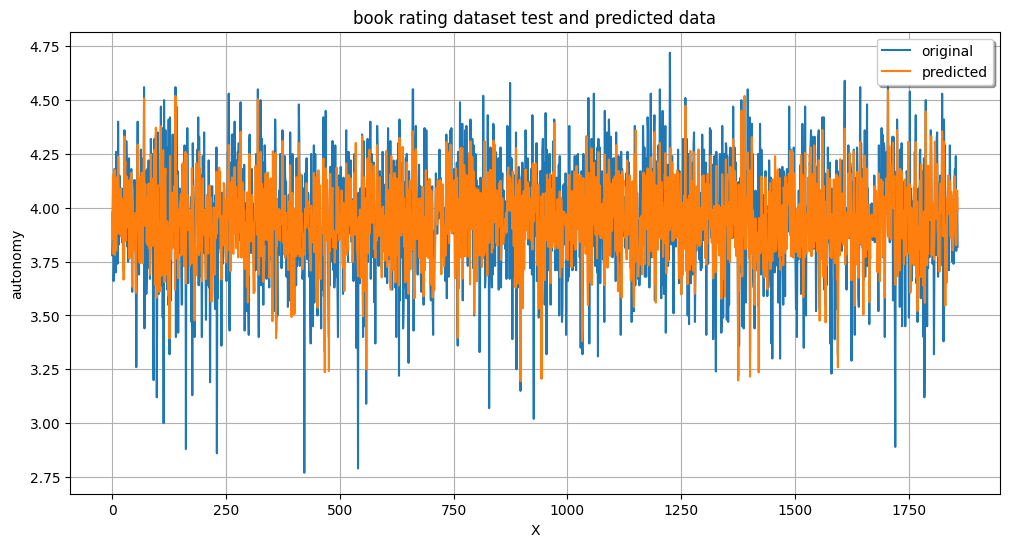

In [48]:
# visualizing in a plot
x_ax = range(len(y_test))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("book rating dataset test and predicted data")
plt.xlabel('X')
plt.ylabel('autonomy')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()


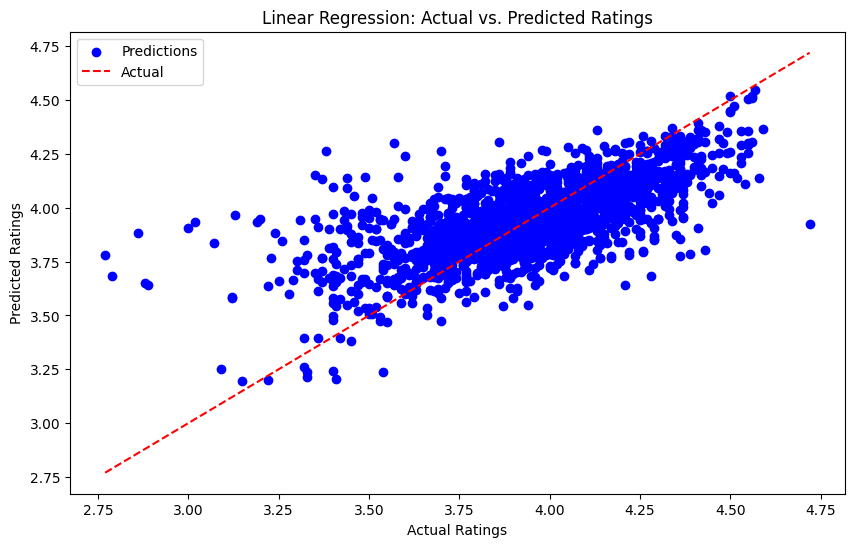

In [49]:
# Plotting the results for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Actual')
plt.title('Linear Regression: Actual vs. Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.legend()
plt.show()

<H2>Random forest

In [50]:
# Assuming you have a DataFrame named 'books_data' containing features and ratings
# X contains the features and y contains the ratings

# Splitting the data into training and testing sets

# Creating a Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the model
rf_model.fit(X_train, y_train)

# Making predictions
predictions = rf_model.predict(X_test)

# Evaluating the model
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Calculate R-squared (R2 score)
r2 = r2_score(y_test, predictions)
print("R-squared (R2) Score:", r2)


Mean Squared Error: 0.03942058670613561
Root Mean Squared Error: 0.19854618280424233
R-squared (R2) Score: 0.45019696712388846


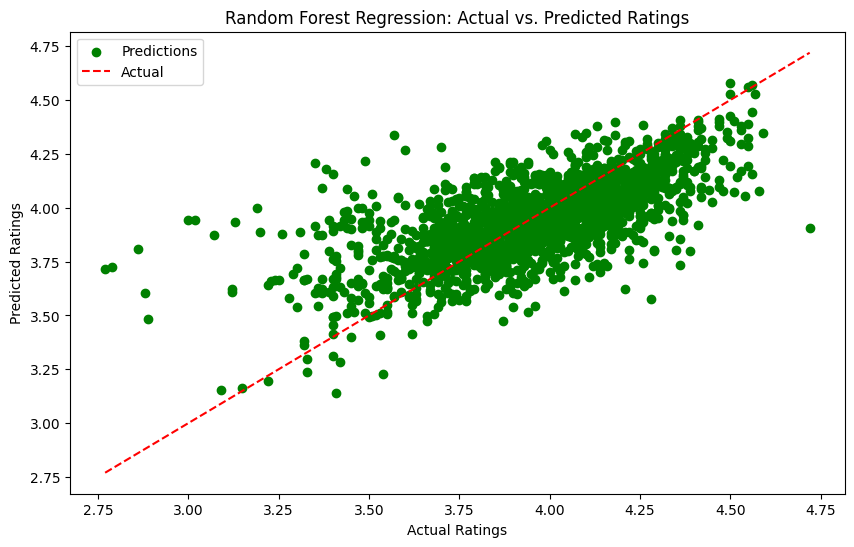

In [51]:
# Plotting the results for Random Forest Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='green', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Actual')
plt.title('Random Forest Regression: Actual vs. Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.legend()
plt.show()


the regression is lightly the best

# <h2>4. Solution 2 - feature engineering, refine and training

<h2>Genres Columns feature - Vectorization

In [52]:
final_df = pd.read_csv(r"Feature DB\improved_dataset.csv")

In [53]:
genre = final_df["genres"]
l = []
for each in genre:
    each = str(each)
    contenu_entre_tirets = re.findall(r"'(.*?)'", each)
    for item in contenu_entre_tirets:
        l.append(item)

print(set(l))
print(len(set(l)))
columns_genre = list(set(l))

{'mystery, thriller, crime', 'fiction', 'children', 'young-adult', 'romance', 'fantasy, paranormal', 'history, historical fiction, biography', 'poetry', 'comics, graphic', 'non-fiction'}
10


So here we can see that there is 10 different categories of genres, so we can try a vectorization over this columns, we need for each columns to get every genres contained in the list

In [54]:
final_df['genres'] = final_df['genres'].apply(lambda x: eval(x))
vectorise_genre=pd.get_dummies(final_df['genres'].apply(pd.Series).stack()).groupby(level=0).sum()

# Replace NaN values with zeros in specified columns
final_df = pd.concat([final_df.drop('genres', axis=1), vectorise_genre], axis=1)

final_df=final_df.drop(columns=["bookID","isbn","isbn13","book_id","publisher"], axis=1)
final_df.head()

,title,authors,average_rating,num_pages,ratings_count,text_reviews_count,publication_date,author_mean_rates,year,month,...,children,"comics, graphic","fantasy, paranormal",fiction,"history, historical fiction, biography","mystery, thriller, crime",non-fiction,poetry,romance,young-adult
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,652,2095690,27591,2006-09-16,4.463,2006.0,9.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,870,2153167,29221,2004-09-01,4.463,2004.0,9.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,352,6333,244,2003-11-01,4.440,2003.0,11.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,435,2339585,36325,2004-05-01,4.463,2004.0,5.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,2690,41428,164,2004-09-13,4.463,2004.0,9.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [55]:
final_df.isna().sum()

title                                      0
authors                                    0
average_rating                             0
num_pages                                  0
ratings_count                              0
text_reviews_count                         0
publication_date                           0
author_mean_rates                          0
year                                       0
month                                      0
day                                        0
children                                  39
comics, graphic                           39
fantasy, paranormal                       39
fiction                                   39
history, historical fiction, biography    39
mystery, thriller, crime                  39
non-fiction                               39
poetry                                    39
romance                                   39
young-adult                               39
dtype: int64

we have some NaN value in the raws when there were no genres associated so we fill them with 0 for showing that they don't have genres

In [56]:
for column in columns_genre:
    final_df[column] = final_df[column].fillna(0)

In [57]:
final_df.isna().sum()

title                                     0
authors                                   0
average_rating                            0
num_pages                                 0
ratings_count                             0
text_reviews_count                        0
publication_date                          0
author_mean_rates                         0
year                                      0
month                                     0
day                                       0
children                                  0
comics, graphic                           0
fantasy, paranormal                       0
fiction                                   0
history, historical fiction, biography    0
mystery, thriller, crime                  0
non-fiction                               0
poetry                                    0
romance                                   0
young-adult                               0
dtype: int64

In [58]:
final_df.to_csv(r"Feature DB\improved_dataset.csv", index=False)

In [59]:
final_df.columns

Index(['title', 'authors', 'average_rating', 'num_pages', 'ratings_count',
       'text_reviews_count', 'publication_date', 'author_mean_rates', 'year',
       'month', 'day', 'children', 'comics, graphic', 'fantasy, paranormal',
       'fiction', 'history, historical fiction, biography',
       'mystery, thriller, crime', 'non-fiction', 'poetry', 'romance',
       'young-adult'],
      dtype='object')

<h2> Count words in titles </h2>

In [60]:
final_df['title_word_count'] = final_df['title'].apply(lambda x: len(str(x).split()))

<h2> Count authors </h2>

In [61]:
final_df['authors_name_count'] = final_df['authors'].apply(lambda x: len(str(x).split('/')))

In [62]:
final_df.to_csv(r"Feature DB\improved_dataset.csv", index=False)

In [63]:
final_df.columns

Index(['title', 'authors', 'average_rating', 'num_pages', 'ratings_count',
       'text_reviews_count', 'publication_date', 'author_mean_rates', 'year',
       'month', 'day', 'children', 'comics, graphic', 'fantasy, paranormal',
       'fiction', 'history, historical fiction, biography',
       'mystery, thriller, crime', 'non-fiction', 'poetry', 'romance',
       'young-adult', 'title_word_count', 'authors_name_count'],
      dtype='object')

In [64]:
final_df.isna().sum()

title                                     0
authors                                   0
average_rating                            0
num_pages                                 0
ratings_count                             0
text_reviews_count                        0
publication_date                          0
author_mean_rates                         0
year                                      0
month                                     0
day                                       0
children                                  0
comics, graphic                           0
fantasy, paranormal                       0
fiction                                   0
history, historical fiction, biography    0
mystery, thriller, crime                  0
non-fiction                               0
poetry                                    0
romance                                   0
young-adult                               0
title_word_count                          0
authors_name_count              

In [65]:
index = final_df.columns
for each in index:
    final_df = final_df.rename(columns={f"{each}" : f"{each.replace(',', '_').replace(' ','')}"})

<h2>Drop

In [66]:
final_df = final_df.drop(['title', 'authors','publication_date'],axis=1)

<h2>training

In [67]:
corr = final_df.corr()
corr['average_rating']

average_rating                         1.000000
num_pages                              0.190673
ratings_count                          0.046939
text_reviews_count                     0.038403
author_mean_rates                      0.663168
year                                  -0.061234
month                                  0.028818
day                                   -0.004724
children                               0.075237
comics_graphic                         0.133356
fantasy_paranormal                     0.046476
fiction                               -0.077092
history_historicalfiction_biography    0.042261
mystery_thriller_crime                -0.072185
non-fiction                            0.127024
poetry                                 0.084534
romance                               -0.082876
young-adult                            0.067407
title_word_count                       0.165503
authors_name_count                     0.033622
Name: average_rating, dtype: float64

some columns have a light correlation but we keep it for trying to have the best result

<h2>Regression

In [68]:
X = final_df.drop(columns=['average_rating'], axis=1)
#X = X.drop(X.)
y = final_df['average_rating']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
# Convert the data into LightGBM Dataset format
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

In [71]:
# Set parameters for the LightGBM model
params = {
    'objective': 'regression', 
    'metric': 'rmse',
    'num_leaves': 31,
    'learning_rate': 0.1,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0,
    'iteration':1000,
    'early_stopping_rounds': 10  # Set early stopping rounds here
}

In [72]:
# Train the model
num_boost_round = 1000  # we can set this to a large number
lgb_model = lgb.train(params, train_data, num_boost_round=num_boost_round,valid_sets=[test_data])

[LightGBM] [Warning] Unknown parameter: iteration
[LightGBM] [Warning] Unknown parameter: iteration
[LightGBM] [Warning] Unknown parameter: iteration


In [73]:
y_pred = lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration)

In [74]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Calculate R-squared (R2 score)
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)

Mean Squared Error: 0.03557626159762607
Root Mean Squared Error: 0.18861670551047718
R-squared (R2) Score: 0.5038141702308974


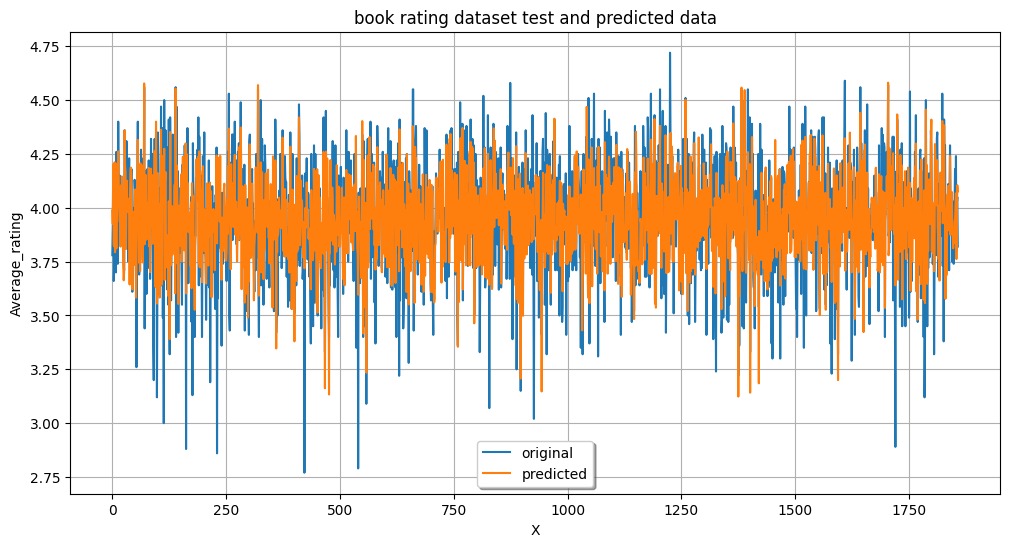

In [75]:
# visualizing in a plot
x_ax = range(len(y_test))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("book rating dataset test and predicted data")
plt.xlabel('X')
plt.ylabel('Average_rating')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

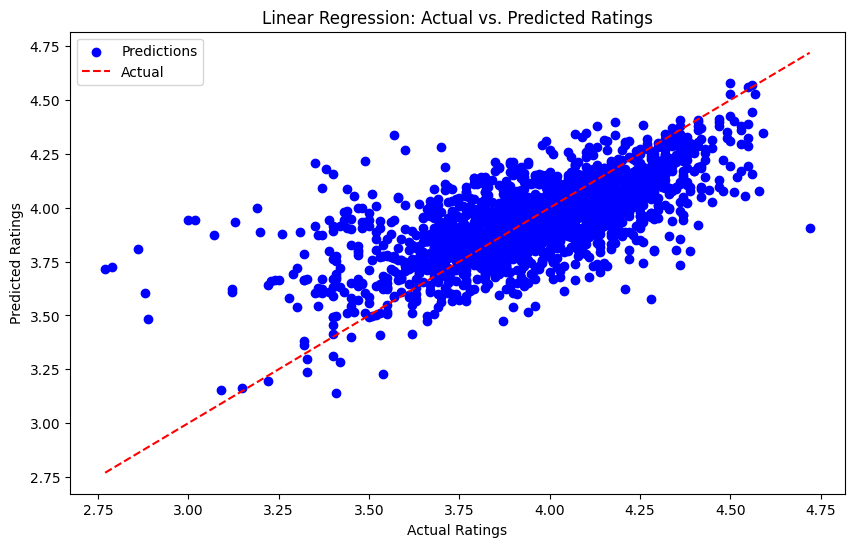

In [76]:
# Plotting the results for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Actual')
plt.title('Linear Regression: Actual vs. Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.legend()
plt.show()

 The decrease in RMSE from 0.196 to 0.188 is a positive outcome, indicating that our regression model is performing better in terms of predicting book ratings. It suggests increased accuracy and reduced prediction errors, leading to a more reliable model that's what we can see in the plot.

<h2>Random Forest

In [77]:


# Assuming you have a DataFrame named 'books_data' containing features and ratings
# X contains the features and y contains the ratings

# Splitting the data into training and testing sets

# Creating a Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the model
rf_model.fit(X_train, y_train)

# Making predictions
predictions = rf_model.predict(X_test)

# Evaluating the model
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Calculate R-squared (R2 score)
r2 = r2_score(y_test, predictions)
print("R-squared (R2) Score:", r2)

Mean Squared Error: 0.035692395914962316
Root Mean Squared Error: 0.18892431266240542
R-squared (R2) Score: 0.5021944327985643


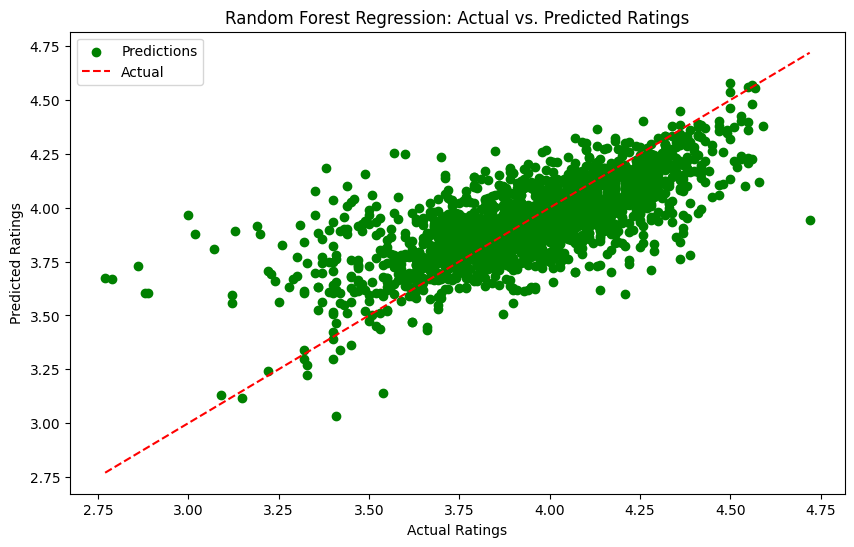

In [78]:
# Plotting the results for Random Forest Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='green', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Actual')
plt.title('Random Forest Regression: Actual vs. Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.legend()
plt.show()


<h2>GBM XGBoost

In [79]:


# Splitting the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Calculate R-squared (R2 score)
r2 = r2_score(y_test, predictions)
print("R-squared (R2) Score:", r2)

Mean Squared Error: 0.035692395914962316
Root Mean Squared Error: 0.18892431266240542
R-squared (R2) Score: 0.5021944327985643


<h2>Neural Networks

In [86]:


# Assuming you have a dataset with features (X) and ratings (y)
# X should be a matrix where each row represents a book and each column represents a feature
# y should be a vector of book ratings

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer with single neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss, mae = model.evaluate(X_test_scaled, y_test)

# Evaluating the model

# Make predictions
predictions = model.predict(X_test_scaled)

# Calculate R-squared (R2 score)
r2 = r2_score(y_test, predictions)
print("R-squared (R2) Score:", r2)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)
print("rmse: ",np.sqrt(mse))


r2 = r2_score(y_test, predictions)
print("r2: ", r2)


Epoch 1/10


c:\Users\natha\.conda\envs\MLP\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.9740 - mae: 1.7375 - val_loss: 0.2618 - val_mae: 0.3796
Epoch 2/10
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - loss: 0.2410 - mae: 0.3564 - val_loss: 0.1379 - val_mae: 0.2812
Epoch 3/10
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1364 - mae: 0.2691 - val_loss: 0.0960 - val_mae: 0.2357
Epoch 4/10
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0899 - mae: 0.2273 - val_loss: 0.0771 - val_mae: 0.2098
Epoch 5/10
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0711 - mae: 0.2028 - val_loss: 0.0638 - val_mae: 0.1883
Epoch 6/10
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0586 - mae: 0.1834 - val_loss: 0.0598 - val_mae: 0.1836
Epoch 7/10
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0526 - mae: 0.1751 - val_loss: 0.0580 - val_mae: 0.1835
Epoch 8/10
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0514 - mae: 0.1713 - val_loss: 0.0529 - val_mae: 0.1731
Epoch 9/10
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.045